# Functional API
#### Not all the network models are simply sequential.Some may have complex topologies.Some may have multiple inputs and/or multiple outputs.For example, a Wide & Deep neural network connects all or part of the inputs directly to the output layer

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import sklearn

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

from sklearn.model_selection import train_test_split

X_Train , X_Test , Y_Train , Y_Test = train_test_split(housing.data , housing.target , random_state = 4)
X_Train , X_Valid , Y_Train , Y_Valid = train_test_split(X_Train , Y_Train , random_state = 4)

from sklearn.preprocessing import StandardScaler

SC = StandardScaler()
X_Train = SC.fit_transform(X_Train)
X_Test = SC.transform(X_Test)
X_Valid = SC.transform(X_Valid)

np.random.seed(4)
tf.random.set_seed(4)

In [254]:
X_Train.shape[1:]

(8,)

In [261]:
input_ = keras.layers.Input(shape = X_Train.shape[1:]) # (8,)
hidden1 = keras.layers.Dense(30 , keras.layers.LeakyReLU(alpha = 0.1))(input_)
hidden1 = keras.layers.Dropout(0.2)(hidden1)
hidden2 = keras.layers.Dense(30 , keras.layers.LeakyReLU(alpha = 0.1))(hidden1)
hidden2 = keras.layers.Dropout(0.2)(hidden2)
concat = keras.layers.concatenate([input_ , hidden2])
output = keras.layers.Dense(1)(concat)

model = keras.models.Model(inputs = [input_] , outputs = [output])

In [262]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 30)           270         input_4[0][0]                    
__________________________________________________________________________________________________
dropout_4 (Dropout)             (None, 30)           0           dense_9[0][0]                    
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 30)           930         dropout_4[0][0]                  
____________________________________________________________________________________________

In [263]:
X_Train.shape , Y_Train.shape

((11610, 8), (11610,))

In [264]:
model.compile(loss = 'mean_squared_error' , optimizer = keras.optimizers.SGD(learning_rate = 1e-4) , metrics = ['mae'])

In [265]:
X_Train.shape

(11610, 8)

In [266]:
1000*30

30000

In [166]:
model_history = model.fit(X_Train , Y_Train , epochs = 30 , validation_data = (X_Valid , Y_Valid))

Epoch 1/30
363/363 [==============================] - 2s 3ms/step - loss: 2.4892 - mae: 1.1683 - val_loss: 0.8843 - val_mae: 0.6574
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.9608 - mae: 0.6998 - val_loss: 0.6864 - val_mae: 0.6029
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.8494 - mae: 0.6667 - val_loss: 0.6506 - val_mae: 0.5886
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.8058 - mae: 0.6423 - val_loss: 0.6712 - val_mae: 0.5731
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.7644 - mae: 0.6254 - val_loss: 0.6018 - val_mae: 0.5701
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.7027 - mae: 0.6139 - val_loss: 0.5790 - val_mae: 0.5541
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6891 - mae: 0.5995 - val_loss: 0.5709 - val_mae: 0.5494
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [167]:
mae_test = model.evaluate(X_Test , Y_Test)

162/162 [==============================] - 0s 1ms/step - loss: 0.5092 - mae: 0.5152


In [168]:
model_history.history

{'loss': [2.4891774654388428,
  0.9608081579208374,
  0.8493687510490417,
  0.8057725429534912,
  0.7644456624984741,
  0.7026780843734741,
  0.6890973448753357,
  0.6900328397750854,
  0.6721681356430054,
  0.6505157947540283,
  0.6180430054664612,
  0.6181443333625793,
  0.6352986693382263,
  0.592666506767273,
  0.6014870405197144,
  0.5932869911193848,
  0.588641881942749,
  0.5693727135658264,
  0.5839959979057312,
  0.5699043273925781,
  0.5545918345451355,
  0.5519731640815735,
  0.5479506850242615,
  0.5422165393829346,
  0.5491456389427185,
  0.5448940992355347,
  0.5399926900863647,
  0.544039785861969,
  0.536510169506073,
  0.5414388179779053],
 'mae': [1.1683331727981567,
  0.699822187423706,
  0.6667211651802063,
  0.6422563791275024,
  0.6253868341445923,
  0.6138855218887329,
  0.5995426774024963,
  0.5930244326591492,
  0.5818021893501282,
  0.5730451345443726,
  0.5712220072746277,
  0.5670750141143799,
  0.5626115798950195,
  0.5614659190177917,
  0.5570877194404602,

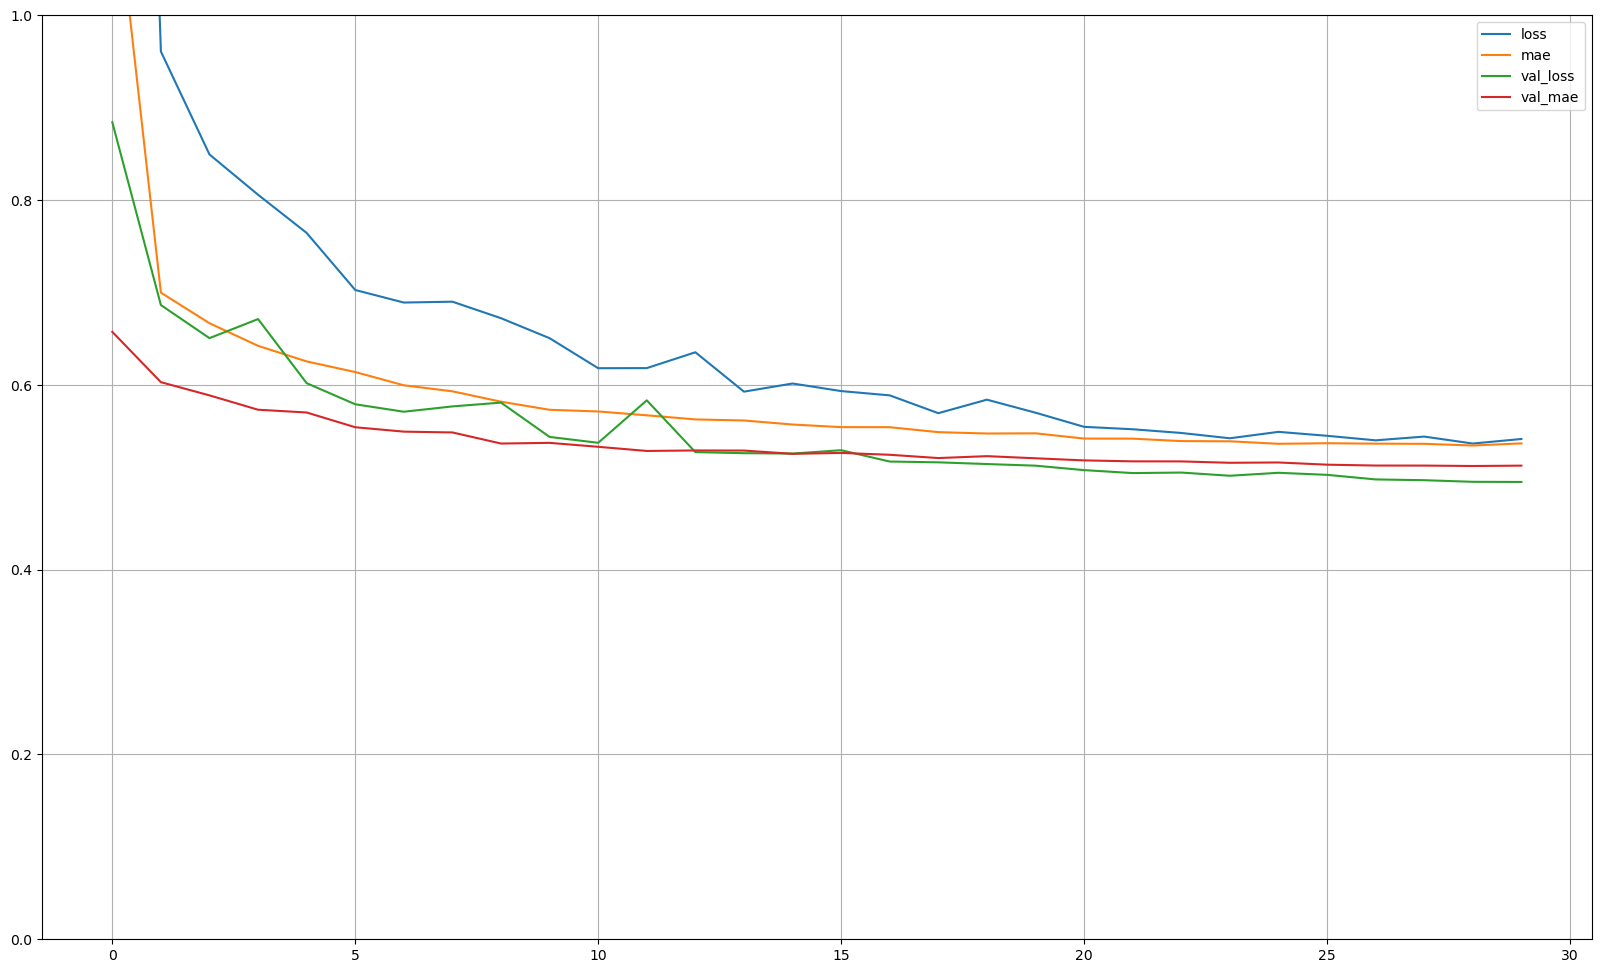

In [169]:
pd.DataFrame(model_history.history).plot(figsize = (20,12))
plt.grid(True)
plt.gca().set_ylim(0 , 1)
plt.show()

## Saving & Restoring Model

In [170]:
model.save('my_func_model.h5')

In [173]:
del model

In [174]:
keras.backend.clear_session()

In [175]:
model = keras.models.load_model('my_func_model.h5')

In [176]:
model.summary()

Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_35 (Dense)                (None, 30)           270         input_14[0][0]                   
__________________________________________________________________________________________________
dropout_16 (Dropout)            (None, 30)           0           dense_35[0][0]                   
__________________________________________________________________________________________________
dense_36 (Dense)                (None, 30)           930         dropout_16[0][0]                 
___________________________________________________________________________________________

In [178]:
X_New = X_Test[:3]

Y_Pred = model.predict(X_New)
print(Y_Pred)

[[1.993581 ]
 [2.57317  ]
 [1.5447407]]


## Using Callbacks During Training

### Saving every epoch

In [197]:
del model

In [198]:
keras.backend.clear_session()

In [199]:
model = keras.models.Sequential([
    keras.layers.Dense(30 , activation = 'relu' , input_shape = (8,)),
    keras.layers.Dense(30 , activation = 'relu'),
    keras.layers.Dense(1)
])

In [200]:
model.compile(loss = 'mse' , optimizer =keras.optimizers.SGD(learning_rate = 1e-3))

In [201]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Model-{epoch:02d}.h5")  # each epoch will be saved # 02 for 2 digits numbers

In [202]:
history = model.fit(X_Train , Y_Train , epochs = 10 , validation_data = (X_Valid , Y_Valid) , callbacks = [checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.6358 - val_loss: 0.7451
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7459 - val_loss: 0.6806
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6881 - val_loss: 0.6366
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6423 - val_loss: 0.5995
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6037 - val_loss: 0.5665
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5712 - val_loss: 0.5401
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5451 - val_loss: 0.5177
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5220 - val_loss: 0.4997
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5036 - val_loss: 0.4838
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4880 - val_loss: 0.4722

In [203]:
del model
keras.backend.clear_session()

In [204]:
model = keras.models.load_model('Model-10.h5')

In [205]:
mse_test = model.evaluate(X_Test , Y_Test)

162/162 [==============================] - 1s 1ms/step - loss: 0.4849


## Best Model Only

### Saving epoch which has less error

In [215]:
del model
keras.backend.clear_session()

In [216]:
model = keras.models.Sequential([
    keras.layers.Dense(30 , activation = 'relu' , input_shape = (8,)),
    keras.layers.Dense(30 , activation = 'relu'),
    keras.layers.Dense(1)
])

In [217]:
model.compile(loss = 'mse' , optimizer =keras.optimizers.SGD(learning_rate = 1e-3))

In [218]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Model-Best.h5" , save_best_only = True)

In [219]:
history = model.fit(X_Train , Y_Train , epochs = 10 , validation_data = (X_Valid , Y_Valid) , callbacks = [checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.8762 - val_loss: 0.8986
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.8136 - val_loss: 0.7305
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7136 - val_loss: 0.6710
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6633 - val_loss: 0.6309
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6290 - val_loss: 0.6014
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6009 - val_loss: 0.5775
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5780 - val_loss: 0.5571
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5581 - val_loss: 0.5407
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5413 - val_loss: 0.5258
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5267 - val_loss: 0.5139

In [220]:
model = keras.models.load_model('Model-Best.h5')

In [221]:
mse_test = model.evaluate(X_Test , Y_Test)

162/162 [==============================] - 0s 1ms/step - loss: 0.5242


## Early Stop Model

### If i have given 200 epochs and my validation set accuracy is not improving after 80 epochs.......it will stop the training and loads epoch which has best value

In [231]:
del model
keras.backend.clear_session()

In [232]:
model = keras.models.Sequential([
    keras.layers.Dense(30 , activation = 'relu' , input_shape = (8,)),
    keras.layers.Dense(30 , activation = 'relu'),
    keras.layers.Dense(1)
])

In [233]:
model.compile(loss = 'mse' , optimizer =keras.optimizers.SGD(learning_rate = 1e-3))

In [234]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Early-Stop-Model.h5" , save_best_only = True)

In [235]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10 , # if 80 has best value then training will stop at 90
                                                 restore_best_weights = True)

In [236]:
history = model.fit(X_Train , Y_Train , epochs = 200 , validation_data = (X_Valid , Y_Valid) ,
                    callbacks = [checkpoint_cb , early_stopping_cb])

Epoch 1/200
363/363 [==============================] - 2s 4ms/step - loss: 2.0373 - val_loss: 0.8022
Epoch 2/200
363/363 [==============================] - 1s 3ms/step - loss: 0.7622 - val_loss: 0.6870
Epoch 3/200
363/363 [==============================] - 1s 3ms/step - loss: 0.6897 - val_loss: 0.6440
Epoch 4/200
363/363 [==============================] - 1s 3ms/step - loss: 0.6468 - val_loss: 0.6113
Epoch 5/200
363/363 [==============================] - 1s 3ms/step - loss: 0.6165 - val_loss: 0.5859
Epoch 6/200
363/363 [==============================] - 1s 2ms/step - loss: 0.5910 - val_loss: 0.5645
Epoch 7/200
363/363 [==============================] - 1s 3ms/step - loss: 0.5701 - val_loss: 0.5470
Epoch 8/200
363/363 [==============================] - 1s 2ms/step - loss: 0.5521 - val_loss: 0.5328
Epoch 9/200
363/363 [==============================] - 1s 3ms/step - loss: 0.5374 - val_loss: 0.5204
Epoch 10/200
363/363 [==============================] - 1s 2ms/step - loss: 0.5251 - val_lo

Epoch 161/200
363/363 [==============================] - 1s 2ms/step - loss: 0.3282 - val_loss: 0.3301
Epoch 162/200
363/363 [==============================] - 1s 2ms/step - loss: 0.3271 - val_loss: 0.3283
Epoch 163/200
363/363 [==============================] - 1s 3ms/step - loss: 0.3269 - val_loss: 0.3289
Epoch 164/200
363/363 [==============================] - 1s 3ms/step - loss: 0.3264 - val_loss: 0.3293
Epoch 165/200
363/363 [==============================] - 1s 2ms/step - loss: 0.3260 - val_loss: 0.3272
Epoch 166/200
363/363 [==============================] - 1s 2ms/step - loss: 0.3263 - val_loss: 0.3294
Epoch 167/200
363/363 [==============================] - 1s 3ms/step - loss: 0.3261 - val_loss: 0.3263
Epoch 168/200
363/363 [==============================] - 1s 3ms/step - loss: 0.3250 - val_loss: 0.3280
Epoch 169/200
363/363 [==============================] - 1s 2ms/step - loss: 0.3251 - val_loss: 0.3280
Epoch 170/200
363/363 [==============================] - 1s 2ms/step - lo

In [237]:
model = keras.models.load_model('Early-Stop-Model.h5')

In [238]:
mse_test = model.evaluate(X_Test , Y_Test)

162/162 [==============================] - 1s 2ms/step - loss: 0.3403
